<a href="https://colab.research.google.com/github/sophie826/sentiment_analysis/blob/main/Sentiment_analysis_Textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob, Word

Test with book review data

In [3]:
#import the book review data
test_file="book-review-sentiment.txt"

#build function to perform sentiment analysis
def analyze_sentiment(text):
  analysis=TextBlob(text)
  if analysis.sentiment.polarity>0:
    return "Positive"
  elif analysis.sentiment.polarity<0:
    return "Negative"
  else:
    return "Neutral"

#perform sentiment analysis
sentiment_score=TextBlob(test_file).sentiment
sentiment=analyze_sentiment(test_file)

#print the results
print(f"Sentiment scores: {sentiment_score}")
print(f"Sentiment analysis Result: {sentiment}")

Sentiment scores: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment analysis Result: Neutral


Sentiment analysis of large dataset - Twitter product review data

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus.reader.twitter import TweetTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#import twitter dataset
twitter_data=pd.read_csv("twitter-product-review.csv")
print(twitter_data.shape)
twitter_data.head(10)

(9873, 2)


,id,tweet
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,Finally a transparant silicon case ^^ Thanks t...
2,3,We love this! Would you go? #talk #makememorie...
3,4,I'm wired I know I'm George I was made that wa...
4,5,What amazing service! Apple won't even talk to...
5,6,iPhone software update fucked up my phone big ...
6,7,Happy for us .. #instapic #instadaily #us #son...
7,8,New Type C charger cable #UK http://www.ebay.c...
8,9,Bout to go shopping again listening to music #...
9,10,Photo: #fun #selfie #pool #water #sony #camera...


Text pre-processing

In [6]:
#create function to preprocess tweet data
def preprocess_tweet(tweet):
  tweet=tweet.lower() #convert to lower case
  tweet=re.sub(r'https?://\S+|www\.\S+', '', tweet, flags=re.MULTILINE) # remove URLs
  tweet=re.sub(r'@\w+', '', tweet) #remove user mentions
  tweet=re.sub(r'[^a-zA-Z\s]', '', tweet) #remove special characters and numbers, keeping only letters
  tweet=re.sub(r'#','',tweet)

  tokenizer=TweetTokenizer()
  tokens=tokenizer.tokenize(tweet) #tokenize the tweet

  stop_words=set(stopwords.words('english')) #remove stop words
  filtered_tokens=[token for token in tokens if token not in stop_words]

  lemmatizer=WordNetLemmatizer() #lemmatization using WordNet
  lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]

  preprocess_tweet=' '.join(lemmatized_tokens) #join the tokens back into string

  return preprocess_tweet

In [7]:
#preprocess each tweet in the list
twitter_data['preprocessed_tweet']=twitter_data['tweet'].apply(preprocess_tweet)

#print out the top 10 preprocessed tweets
print(twitter_data.head(10))

   id                                              tweet  \
0   1  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1   2  Finally a transparant silicon case ^^ Thanks t...   
2   3  We love this! Would you go? #talk #makememorie...   
3   4  I'm wired I know I'm George I was made that wa...   
4   5  What amazing service! Apple won't even talk to...   
5   6  iPhone software update fucked up my phone big ...   
6   7  Happy for us .. #instapic #instadaily #us #son...   
7   8  New Type C charger cable #UK http://www.ebay.c...   
8   9  Bout to go shopping again listening to music #...   
9  10  Photo: #fun #selfie #pool #water #sony #camera...   

                                  preprocessed_tweet  
0  fingerprint pregnancy test android apps beauti...  
1  finally transparant silicon case thanks uncle ...  
2  love would go talk makememories unplug relax i...  
3  im wired know im george made way iphone cute d...  
4  amazing service apple wont even talk question ...  
5  iphone

Sentiment analysis

In [8]:
#define a function to calculate polarity and subjectivity for a given tweet
def get_sentiment_scores(tweet):
  analysis=TextBlob(tweet)
  return analysis.sentiment.polarity, analysis.sentiment.subjectivity

#apply the function to each row of the df and store results in two new columns
twitter_data['polarity'], twitter_data['subjectivity']=zip(*twitter_data['preprocessed_tweet'].apply(get_sentiment_scores))

#print the first 10 rows of the updated df
print(twitter_data.head(10))

#calculate overall polarity and subjectivity
overall_polarity=twitter_data['polarity'].mean()
overall_subjectivity=twitter_data['subjectivity'].mean()

print(f"Overall polarity: {overall_polarity}")
print(f"Overall subjectivity: {overall_subjectivity}")


   id                                              tweet  \
0   1  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1   2  Finally a transparant silicon case ^^ Thanks t...   
2   3  We love this! Would you go? #talk #makememorie...   
3   4  I'm wired I know I'm George I was made that wa...   
4   5  What amazing service! Apple won't even talk to...   
5   6  iPhone software update fucked up my phone big ...   
6   7  Happy for us .. #instapic #instadaily #us #son...   
7   8  New Type C charger cable #UK http://www.ebay.c...   
8   9  Bout to go shopping again listening to music #...   
9  10  Photo: #fun #selfie #pool #water #sony #camera...   

                                  preprocessed_tweet  polarity  subjectivity  
0  fingerprint pregnancy test android apps beauti...  0.675000      1.000000  
1  finally transparant silicon case thanks uncle ...  0.100000      0.600000  
2  love would go talk makememories unplug relax i...  0.500000      0.600000  
3  im wired know im geo

In [25]:
#categorize polairty into positive, negative and neurtal
def categorize_polarity (polarity):
  if polarity>0:
    return 'positive'
  elif polarity<0:
    return 'negative'
  else:
    return 'netural'
twitter_data['polarity_category']=twitter_data['polarity'].apply(categorize_polarity)

#categorize subjectivity into objective and subjective
def categorize_subjectivity (subjectivity):
  if subjectivity>0.5:
    return 'subjective'
  else:
    return 'objective'
twitter_data['subjectivity_category']=twitter_data['subjectivity'].apply(categorize_subjectivity)

print(twitter_data.head(10))

   id                                              tweet  \
0   1  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1   2  Finally a transparant silicon case ^^ Thanks t...   
2   3  We love this! Would you go? #talk #makememorie...   
3   4  I'm wired I know I'm George I was made that wa...   
4   5  What amazing service! Apple won't even talk to...   
5   6  iPhone software update fucked up my phone big ...   
6   7  Happy for us .. #instapic #instadaily #us #son...   
7   8  New Type C charger cable #UK http://www.ebay.c...   
8   9  Bout to go shopping again listening to music #...   
9  10  Photo: #fun #selfie #pool #water #sony #camera...   

                                  preprocessed_tweet  polarity  subjectivity  \
0  fingerprint pregnancy test android apps beauti...  0.675000      1.000000   
1  finally transparant silicon case thanks uncle ...  0.100000      0.600000   
2  love would go talk makememories unplug relax i...  0.500000      0.600000   
3  im wired know im

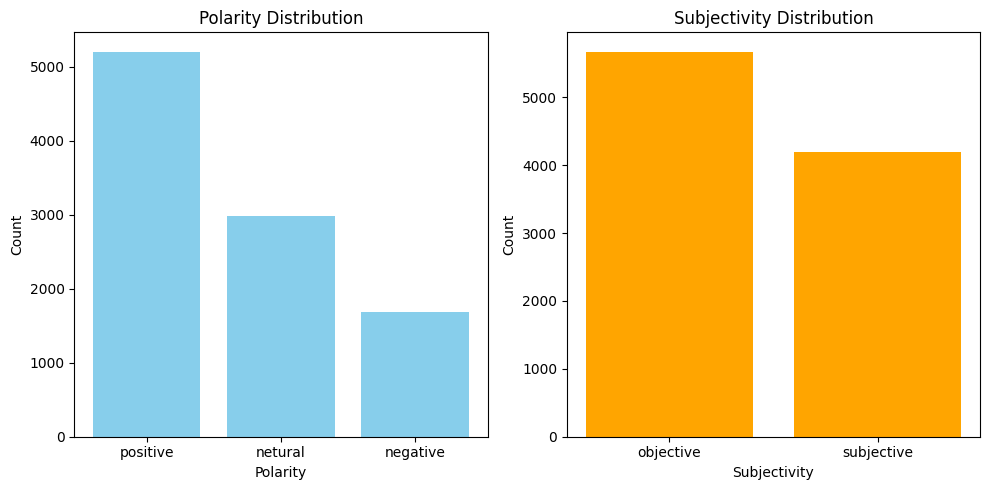

In [26]:
# Count the occurrences of each unique value in 'polarity' and 'subjectivity'
polarity_counts = twitter_data['polarity_category'].value_counts()
subjectivity_counts = twitter_data['subjectivity_category'].value_counts()

# Plotting the bar graph for polarity
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Creating a subplot for polarity
plt.bar(polarity_counts.index, polarity_counts.values, color='skyblue')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

# Plotting the bar graph for subjectivity
plt.subplot(1, 2, 2)  # Creating a subplot for subjectivity
plt.bar(subjectivity_counts.index, subjectivity_counts.values, color='orange')
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Subjectivity Distribution')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()
